In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [5]:
def run(filename, period, cash):

    data = pd.read_csv('quotes/' + filename, parse_dates=['<DATE>'])
    data.columns = [d[1:-1].lower() for d in data.columns]
    data['ema'] = data.close.ewm(span=period, adjust=False).mean()
    data['dev'] = data.close - data.ema
    data['deal'] = np.nan

    ingame = False

    for i in range(period + 1, len(data) - 1):
        if ingame is False and data.dev[i-2] < 0 and data.dev[i-1] >= 0:
            data.loc[i, 'deal'] = 'in'
            ingame = True
        if ingame is True and data.dev[i-1] < 0:
            data.loc[i, 'deal'] = 'out'
            ingame = False

    deals = data[data.deal.notna()].copy()
    deals['profit'] = deals.open.rolling(window=2).apply(lambda x: (x[1] - x[0]) / x[0], raw=True)
    deals['total'] = deals.profit + 1
    deals = deals[deals['deal'] == 'out'].loc[:, ['date', 'profit', 'total']]
    deals.index = range(len(deals))
    deals.dropna(inplace=True)    
    
    win = len(deals[deals.profit > 0])
    loss = len(deals[deals.profit <= 0])
    percent_of_win = round(len(deals[deals.profit > 0]) * 100 / len(deals), 2)
    sharp = round(deals.profit.mean() / deals.profit.std(), 2)

    worse = round(min(deals.profit * cash), 2)
    best = round(max(deals.profit * cash), 2)
    total = round(sum(deals.profit * cash) + 10000, 2)

    res = cash
    drawdown = np.inf

    for p in deals.profit:
        res += res * p
        if drawdown > res:
            drawdown = res
    
    return filename.split('_')[0], period, win, loss, percent_of_win, sharp, \
           worse, best, total, round(drawdown, 2), round(res, 2)

In [6]:
files = os.listdir('quotes')
arr = []

for file in files:
    for i in range(2, 101):
        arr.append(run(file, i, 10000))

In [17]:
data = pd.DataFrame(arr)
data.columns = ['quote', 'per', 'win', 'loss', '% of win', 'sharp', 
                'worse', 'best', 'total', 'drawdown', 'cumsum']

In [18]:
data.sort_values(by=['total'], ascending=False)

,quote,per,win,loss,% of win,sharp,worse,best,total,drawdown,cumsum
562,PLZL,69,9,19,32.14,0.21,-434.08,31163.73,45662.85,35680.65,58855.47
529,PLZL,36,18,32,36.00,0.23,-337.75,14763.19,36445.74,9726.29,65993.56
528,PLZL,35,18,32,36.00,0.23,-337.75,14763.19,36417.57,9726.29,65807.33
527,PLZL,34,20,33,37.74,0.23,-337.75,14086.60,35933.20,9702.63,64688.56
553,PLZL,60,13,28,31.71,0.25,-506.14,13815.97,35630.90,9726.29,59118.82
554,PLZL,61,13,27,32.50,0.25,-506.14,13815.97,35449.95,9726.29,58024.71
556,PLZL,63,12,24,33.33,0.27,-434.08,13364.91,35395.68,9726.29,59787.07
552,PLZL,59,14,28,33.33,0.24,-506.14,13815.97,35300.73,9726.29,57314.73
550,PLZL,57,15,27,35.71,0.25,-506.14,13725.76,35289.24,9726.29,57550.49
551,PLZL,58,15,27,35.71,0.25,-506.14,13725.76,35289.24,9726.29,57550.49


In [10]:
data.to_csv('EMA_vs_close_result.csv')

In [21]:
data = pd.read_csv('EMA_vs_close_result.csv')
data['sharp_total'] = data.sharp * data.total

In [22]:
data.quote.unique()

array(['TATNP', 'TGKA', 'UPRO', 'CHMF', 'SBER', 'PLZL', 'VTBR', 'AKRN',
       'SNGSP', 'SNGS', 'SBERP', 'RSTI', 'TATN', 'ALRS'], dtype=object)

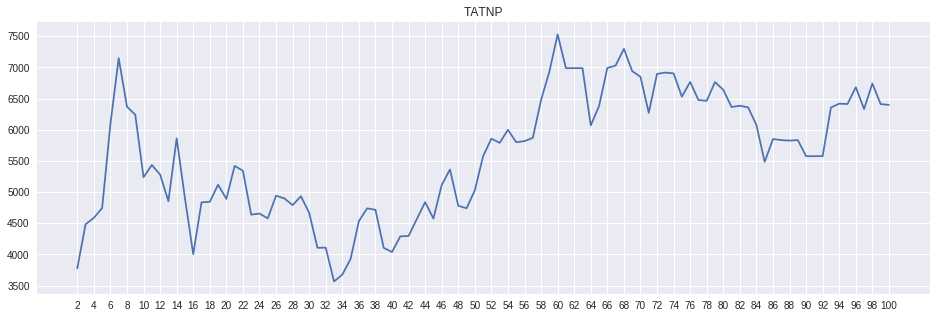

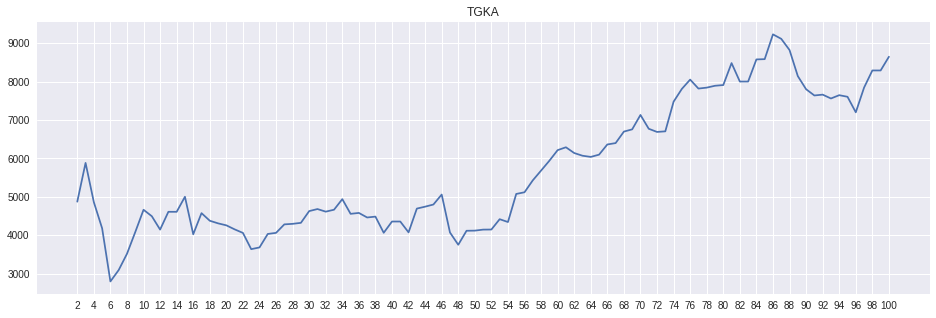

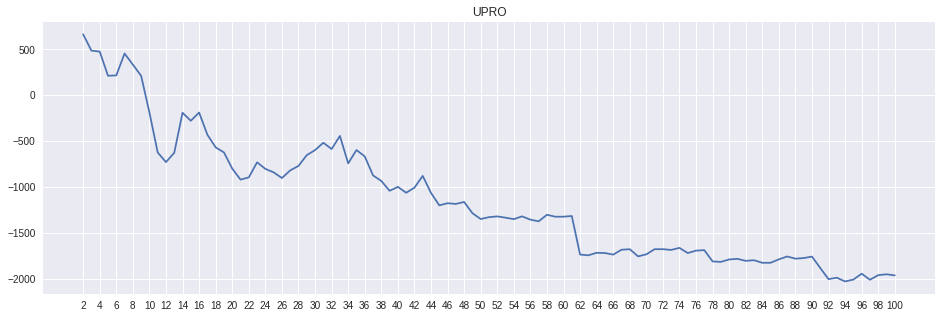

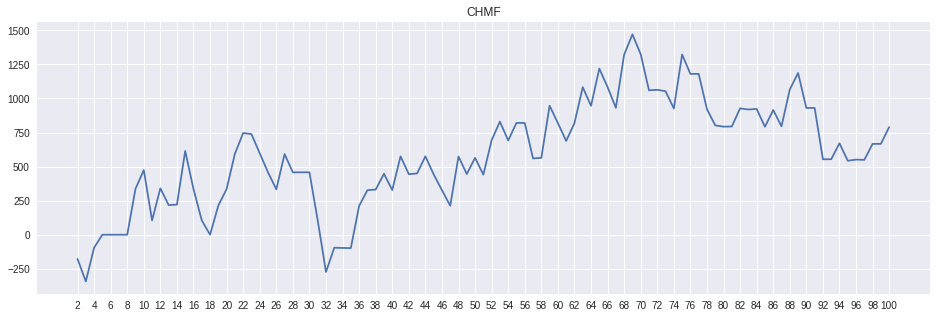

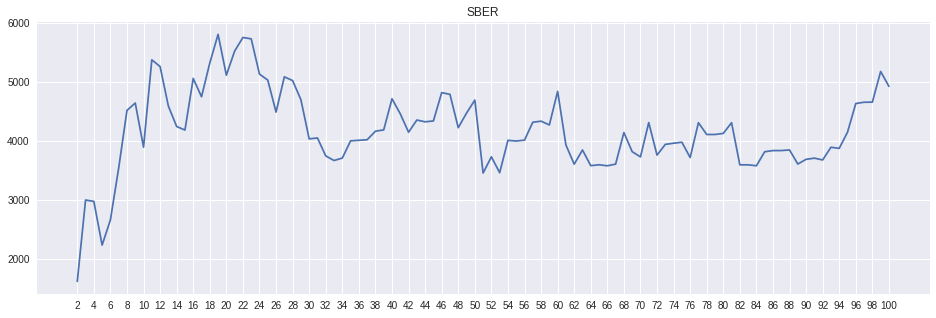

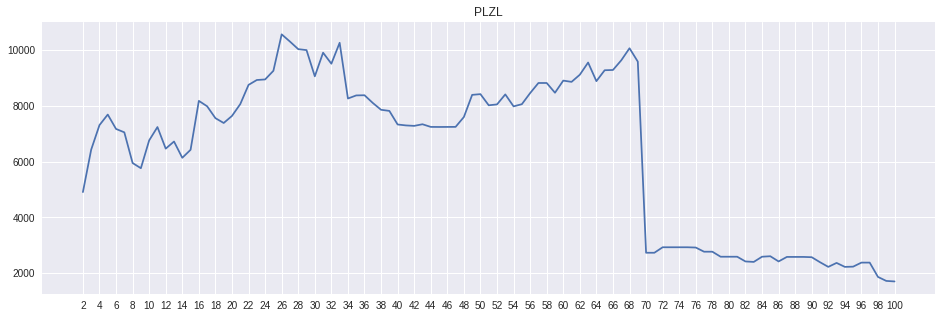

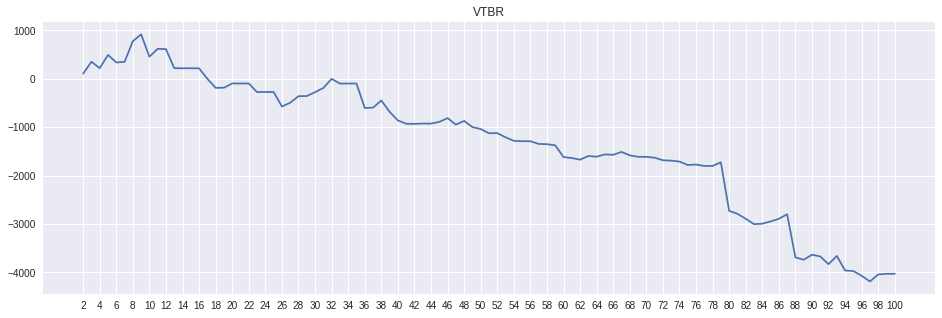

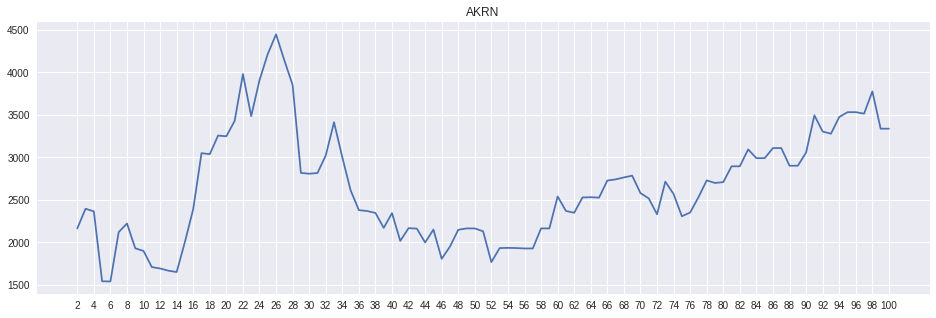

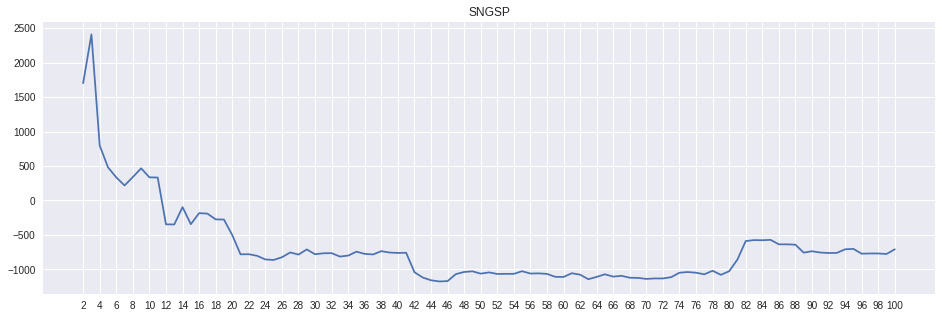

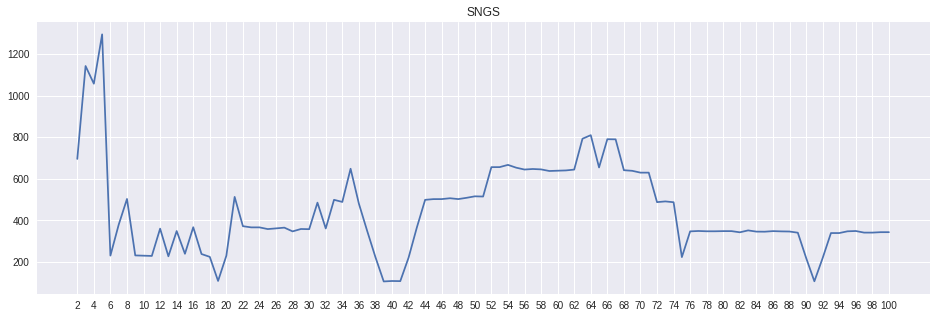

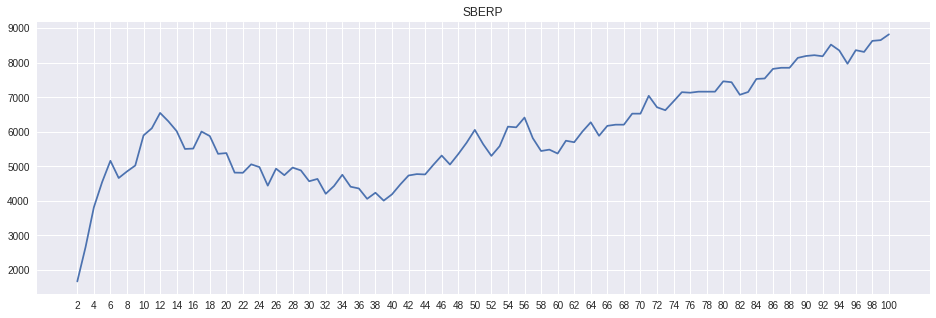

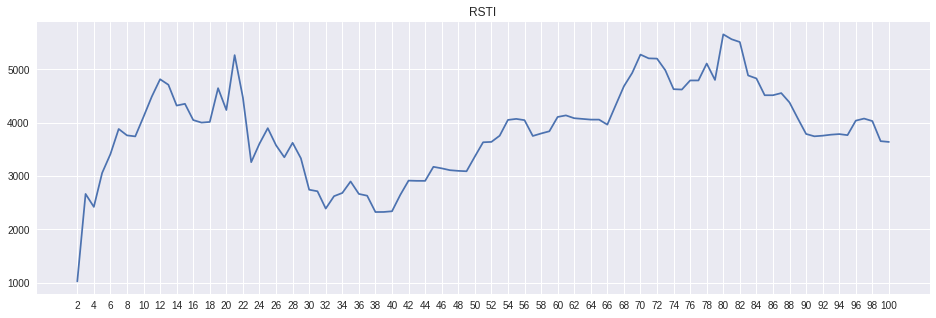

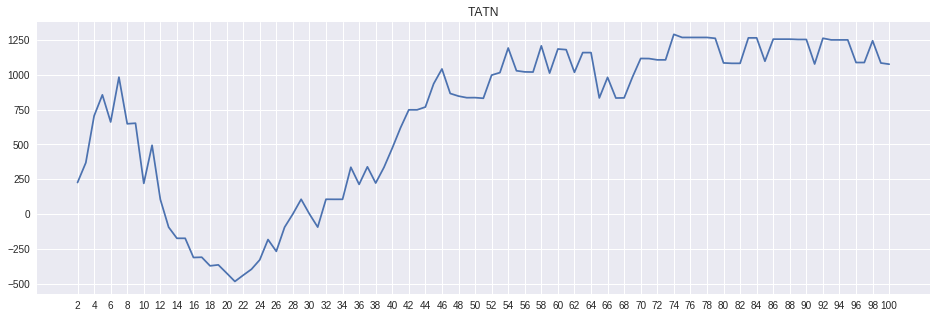

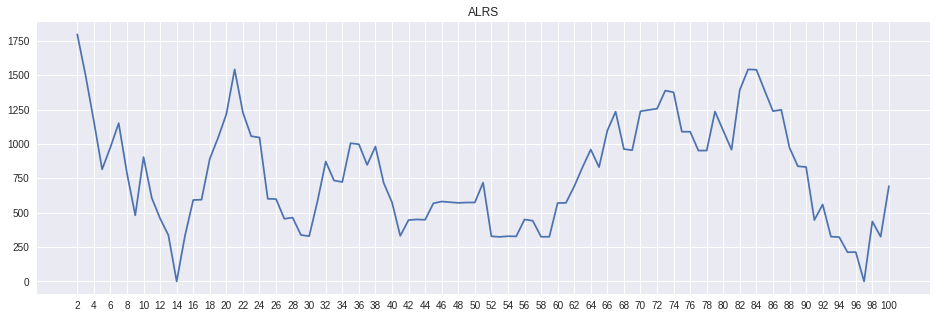

In [23]:
for quote in data.quote.unique():
    x = data[data.quote == quote].per
    y = data[data.quote == quote].sharp_total
    plt.figure(figsize=(16, 5))
    plt.plot(x, y)
    plt.title(quote)
    plt.xticks(np.arange(2, 101, 2))